In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('hr_data.csv')
df.head(40)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


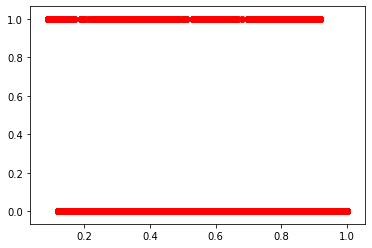

In [15]:
plt.scatter(df['satisfaction_level'],df['left'],color='red')

In [16]:
df_salary = pd.get_dummies(df['salary'])

In [18]:
df_dummy = pd.concat([df,df_salary],axis=1)

In [21]:
df_dummy = df_dummy.drop(['salary'],axis=1)
df_dummy.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,high,low,medium
0,0.38,0.53,2,157,3,0,1,0,sales,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,0,1,0


In [30]:
real_x = df_dummy.iloc[:,[0,1,2,3,4,5,7,9,10,11]].values
real_x

array([[0.38, 0.53, 2.  , ..., 0.  , 1.  , 0.  ],
       [0.8 , 0.86, 5.  , ..., 0.  , 0.  , 1.  ],
       [0.11, 0.88, 7.  , ..., 0.  , 0.  , 1.  ],
       ...,
       [0.37, 0.53, 2.  , ..., 0.  , 1.  , 0.  ],
       [0.11, 0.96, 6.  , ..., 0.  , 1.  , 0.  ],
       [0.37, 0.52, 2.  , ..., 0.  , 1.  , 0.  ]])

In [31]:
real_y =df_dummy.iloc[:,6].values
real_y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [33]:
training_x,testing_x,training_y,testing_y = train_test_split(real_x,real_y,test_size=0.3,random_state=0)

In [43]:
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(training_x,training_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
log_reg.predict(testing_x)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [42]:
log_reg.score(testing_x,testing_y)

0.7873333333333333